In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pf = pd.read_csv('new_performance.csv', index_col = 0)

In [6]:
pf.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,date,week,time
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01 00:00:00,1,06:00:00
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,2019-01-01 00:00:00,1,06:00:00
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,2019-01-01 00:00:00,1,06:20:00
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,2019-01-01 00:00:00,1,06:20:00
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,2019-01-01 00:00:00,1,06:40:00


In [9]:
pf['Date'] = pd.to_datetime(pf['date'])
pf.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,date,week,time,Date
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01 00:00:00,1,06:00:00,2019-01-01
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,2019-01-01 00:00:00,1,06:00:00,2019-01-01
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,2019-01-01 00:00:00,1,06:20:00,2019-01-01
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,2019-01-01 00:00:00,1,06:20:00,2019-01-01
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,2019-01-01 00:00:00,1,06:40:00,2019-01-01


In [10]:
pf['Hour'] = pd.to_datetime(pf['time']).dt.hour

In [15]:
del pf['date']

In [16]:
pf.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,week,time,Date,Hour
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,06:00:00,2019-01-01,6
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,06:00:00,2019-01-01,6
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,06:20:00,2019-01-01,6
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,06:20:00,2019-01-01,6
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,06:40:00,2019-01-01,6


In [73]:
pf['상품군'].unique()

array(['의류', '속옷', '주방', '농수축', '이미용', '가전', '생활용품', '건강기능', '잡화', '가구',
       '침구'], dtype=object)

In [112]:
profit = pf[['Date', '취급액']].groupby('Date').sum()
profit = profit.reset_index()
profit['Date'] = profit['Date'].dt.date
profit

,Date,취급액
0,2019-01-01,2.816742e+09
1,2019-01-02,2.014883e+09
2,2019-01-03,2.060481e+09
3,2019-01-04,2.098340e+09
4,2019-01-05,2.621392e+09
...,...,...
360,2019-12-27,2.066801e+09
361,2019-12-28,2.694822e+09
362,2019-12-29,2.835627e+09
363,2019-12-30,2.216295e+09


In [116]:
wt = pd.read_csv('월별인구가중합날씨.csv')
wt.head()

,time,TEMP,HUM
0,2019-01-01 01:00,-5.157666,53.621521
1,2019-01-01 02:00,-5.577352,56.876710
2,2019-01-01 03:00,-5.922292,58.845987
3,2019-01-01 04:00,-6.223195,60.195692
4,2019-01-01 05:00,-6.449101,61.929722


In [117]:
wt['Date'] = pd.to_datetime(wt['time']).dt.date

In [118]:
wt.head()

,time,TEMP,HUM,Date
0,2019-01-01 01:00,-5.157666,53.621521,2019-01-01
1,2019-01-01 02:00,-5.577352,56.876710,2019-01-01
2,2019-01-01 03:00,-5.922292,58.845987,2019-01-01
3,2019-01-01 04:00,-6.223195,60.195692,2019-01-01
4,2019-01-01 05:00,-6.449101,61.929722,2019-01-01


In [121]:
wt_mean = wt.groupby('Date').mean()
wt_mean

,TEMP,HUM
Date,,
2019-01-01,-3.293676,54.311806
2019-01-02,-3.482380,49.317185
2019-01-03,-2.806238,45.090559
2019-01-04,-1.354785,52.218432
2019-01-05,-0.455875,46.074243
...,...,...
2020-06-26,22.073371,80.587876
2020-06-27,23.234782,75.207594
2020-06-28,23.827143,74.627304


In [122]:
pw = pd.merge(profit, wt_mean, on = 'Date')
pw

,Date,취급액,TEMP,HUM
0,2019-01-01,2.816742e+09,-3.293676,54.311806
1,2019-01-02,2.014883e+09,-3.482380,49.317185
2,2019-01-03,2.060481e+09,-2.806238,45.090559
3,2019-01-04,2.098340e+09,-1.354785,52.218432
4,2019-01-05,2.621392e+09,-0.455875,46.074243
...,...,...,...,...
360,2019-12-27,2.066801e+09,-0.082535,52.983031
361,2019-12-28,2.694822e+09,0.609931,57.146957
362,2019-12-29,2.835627e+09,2.520647,67.185852
363,2019-12-30,2.216295e+09,4.378866,80.162430


In [48]:
pw['Month'] = pd.to_datetime(pw['Date']).dt.month 
pw.head()

,Date,Hour,취급액,time,TEMP,HUM,Month
0,2019-01-01,1,43858000.0,2019-01-01 01:00,-5.157666,53.621521,1
1,2019-01-01,6,32696000.0,2019-01-01 06:00,-6.576974,63.524958,1
2,2019-01-01,7,47878000.0,2019-01-01 07:00,-6.665492,64.572034,1
3,2019-01-01,8,99736000.0,2019-01-01 08:00,-6.565690,64.825631,1
4,2019-01-01,9,90973000.0,2019-01-01 09:00,-5.295367,59.925421,1


## 취급액과 기온의 상관관계

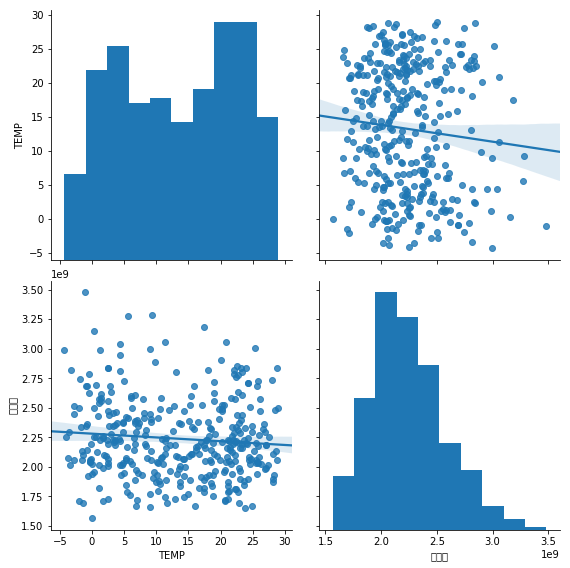

In [123]:
pair = pw[['TEMP', '취급액']]
sns.pairplot(pair, kind='reg', height=4)  

In [124]:
import scipy.stats as stats

# 피어슨 상관계수 검정
corr = stats.pearsonr(pw.TEMP, pw.취급액)
corr

(-0.08867107530744298, 0.0907258454602049)

## 특정 월(ex. 6월) 취급액과 기온의 상관관계

In [69]:
pw1 = pw[pw['Month'] == 6]
pw1.head()

,Date,Hour,취급액,time,TEMP,HUM,Month
2965,2019-06-01,1,30769000.0,2019-06-01 01:00,14.731209,76.891902,6
2966,2019-06-01,6,49543000.0,2019-06-01 06:00,13.753577,83.441440,6
2967,2019-06-01,7,76661000.0,2019-06-01 07:00,14.860688,79.024326,6
2968,2019-06-01,8,229085000.0,2019-06-01 08:00,16.575641,69.651877,6
2969,2019-06-01,9,166333000.0,2019-06-01 09:00,18.255209,62.756631,6


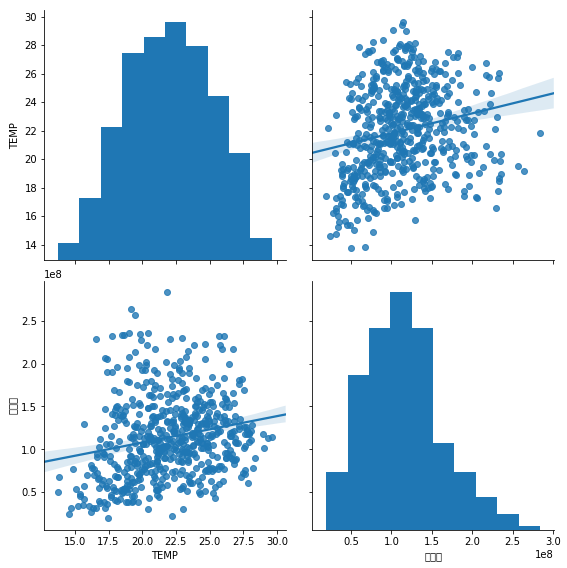

In [70]:
pair = pw1[['TEMP', '취급액']]
sns.pairplot(pair, kind='reg', height=4)  

In [71]:
# 피어슨 상관계수 검정
corr = stats.pearsonr(pw1.TEMP, pw1.취급액)
corr

(0.20753442024211882, 4.2951655026218177e-07)

## 특정 월(ex. 6월) and 의류 상품군 취급액과 기온의 상관관계

In [74]:
spf = pf[pf['상품군']=='의류']
spf = spf[['Date', 'Hour', '취급액']].groupby(['Date', 'Hour']).sum()
spf = spf.reset_index()
spf['Date'] = spf['Date'].dt.date
spf

,Date,Hour,취급액
0,2019-01-01,0,60105000.0
1,2019-01-01,6,32696000.0
2,2019-01-01,8,99736000.0
3,2019-01-01,9,90973000.0
4,2019-01-01,10,259678000.0
...,...,...,...
1222,2019-12-31,7,41540000.0
1223,2019-12-31,10,95087000.0
1224,2019-12-31,11,84192000.0
1225,2019-12-31,18,71417000.0


In [75]:
spw = pd.merge(spf, wt, on = ['Date', 'Hour'])
spw

,Date,Hour,취급액,time,TEMP,HUM
0,2019-01-01,6,32696000.0,2019-01-01 06:00,-6.576974,63.524958
1,2019-01-01,8,99736000.0,2019-01-01 08:00,-6.565690,64.825631
2,2019-01-01,9,90973000.0,2019-01-01 09:00,-5.295367,59.925421
3,2019-01-01,10,259678000.0,2019-01-01 10:00,-3.549878,54.033338
4,2019-01-01,14,119930000.0,2019-01-01 14:00,0.253897,49.054205
...,...,...,...,...,...,...
1215,2019-12-30,12,54891000.0,2019-12-30 12:00,6.746882,84.127175
1216,2019-12-30,13,52850000.0,2019-12-30 13:00,7.135259,84.548031
1217,2019-12-30,14,34445000.0,2019-12-30 14:00,7.393398,83.726520
1218,2019-12-30,16,44838000.0,2019-12-30 16:00,7.019932,76.836261


In [76]:
spw['Month'] = pd.to_datetime(spw['Date']).dt.month 
spw.head()

,Date,Hour,취급액,time,TEMP,HUM,Month
0,2019-01-01,6,32696000.0,2019-01-01 06:00,-6.576974,63.524958,1
1,2019-01-01,8,99736000.0,2019-01-01 08:00,-6.565690,64.825631,1
2,2019-01-01,9,90973000.0,2019-01-01 09:00,-5.295367,59.925421,1
3,2019-01-01,10,259678000.0,2019-01-01 10:00,-3.549878,54.033338,1
4,2019-01-01,14,119930000.0,2019-01-01 14:00,0.253897,49.054205,1


In [77]:
spw6 = spw[spw['Month'] == 6]
spw6.head()

,Date,Hour,취급액,time,TEMP,HUM,Month
523,2019-06-01,7,76661000.0,2019-06-01 07:00,14.860688,79.024326,6
524,2019-06-01,8,229085000.0,2019-06-01 08:00,16.575641,69.651877,6
525,2019-06-01,10,141502000.0,2019-06-01 10:00,19.779273,56.374212,6
526,2019-06-01,13,102477000.0,2019-06-01 13:00,22.458557,48.225516,6
527,2019-06-01,15,129282000.0,2019-06-01 15:00,23.020235,44.964774,6


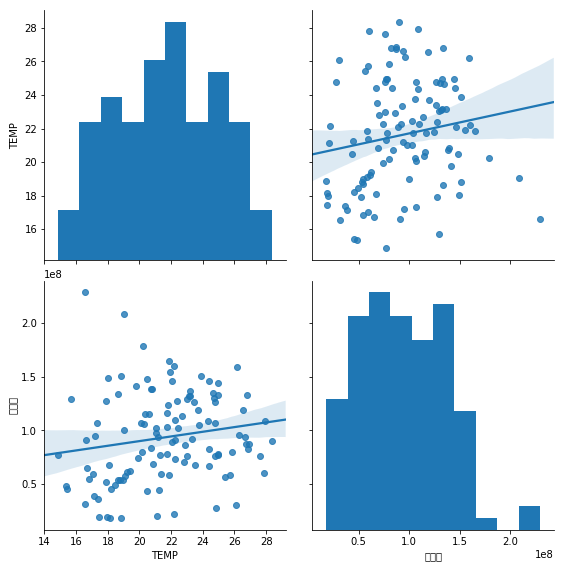

In [79]:
pair = spw6[['TEMP', '취급액']]
sns.pairplot(pair, kind='reg', height=4)  

In [80]:
# 피어슨 상관계수 검정
corr = stats.pearsonr(spw6.TEMP, spw6.취급액)
corr

(0.16859915903042288, 0.07167289197240435)

## 취급액과 습도의 상관관계

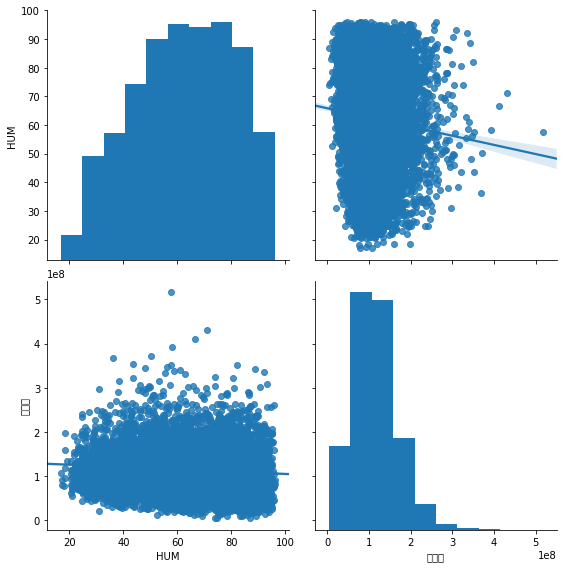

In [44]:
pair = pw[['HUM', '취급액']]
sns.pairplot(pair, kind='reg', height=4)  

In [45]:
# 피어슨 상관계수 검정
corr = stats.pearsonr(pw.HUM, pw.취급액)
corr

(-0.09129527973274566, 1.3058760070419123e-14)

## 특정 월(ex. 6월) 취급액과 습도의 상관관계

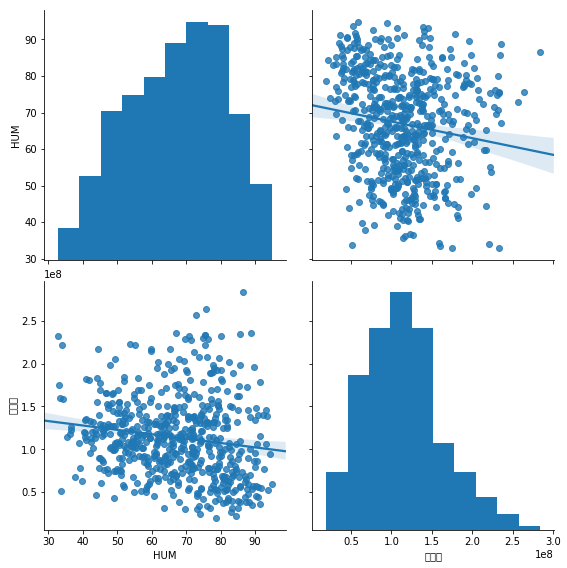

In [52]:
pair = pw1[['HUM', '취급액']]
sns.pairplot(pair, kind='reg', height=4)  

In [53]:
# 피어슨 상관계수 검정
corr = stats.pearsonr(pw1.HUM, pw1.취급액)
corr

(-0.15253252141869642, 0.0002184148554755672)

## 에어컨

In [101]:
import re
def make_re(x):
    pattern = re.compile('에어컨')
    m = pattern.search(x)
    if m:
        return True
    else:
        return False

In [102]:
pf['re'] = pf['상품명'].map(lambda x: make_re(x))
pf

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,week,time,Date,Hour,상품명split,re
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,06:00:00,2019-01-01,6,"[테이트, 남성, 셀린니트3종]",False
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,06:00:00,2019-01-01,6,"[테이트, 여성, 셀린니트3종]",False
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,06:20:00,2019-01-01,6,"[테이트, 남성, 셀린니트3종]",False
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,06:20:00,2019-01-01,6,"[테이트, 여성, 셀린니트3종]",False
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,06:40:00,2019-01-01,6,"[테이트, 남성, 셀린니트3종]",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,1,23:40:00,2019-12-31,23,"[일시불쿠첸압력밥솥, 6인용]",False
38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,1,00:00:00,2019-12-31,0,"[무이자쿠첸압력밥솥, 10인용]",False
38301,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,1,00:00:00,2019-12-31,0,"[일시불쿠첸압력밥솥, 10인용]",False
38302,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,1,00:00:00,2019-12-31,0,"[무이자쿠첸압력밥솥, 6인용]",False


In [111]:
air = pf[pf['re']]
air

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,week,time,Date,Hour,상품명split,re
7764,2019-03-20 16:00:00,20.0,100149,200546,일시불 LG 휘센 에어컨 위너 FQ17V8WWJ2(2in1),가전,2209000,12829000.0,2,16:00:00,2019-03-20,16,"[일시불, LG, 휘센, 에어컨, 위너, FQ17V8WWJ2(2in1)]",True
7765,2019-03-20 16:00:00,20.0,100149,200479,무이자 LG 휘센 에어컨 위너 FQ17V8WWJ2(2in1),가전,2299000,17825000.0,2,16:00:00,2019-03-20,16,"[무이자, LG, 휘센, 에어컨, 위너, FQ17V8WWJ2(2in1)]",True
7768,2019-03-20 16:20:00,20.0,100149,200546,일시불 LG 휘센 에어컨 위너 FQ17V8WWJ2(2in1),가전,2209000,8569000.0,2,16:20:00,2019-03-20,16,"[일시불, LG, 휘센, 에어컨, 위너, FQ17V8WWJ2(2in1)]",True
7769,2019-03-20 16:20:00,20.0,100149,200479,무이자 LG 휘센 에어컨 위너 FQ17V8WWJ2(2in1),가전,2299000,26693000.0,2,16:20:00,2019-03-20,16,"[무이자, LG, 휘센, 에어컨, 위너, FQ17V8WWJ2(2in1)]",True
7771,2019-03-20 16:20:00,20.0,100149,200478,무이자 LG 휘센 에어컨 위너 FQ17V8WWJ1(스탠드),가전,1989000,11589000.0,2,16:20:00,2019-03-20,16,"[무이자, LG, 휘센, 에어컨, 위너, FQ17V8WWJ1(스탠드)]",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23192,2019-08-06 20:20:00,20.0,100149,200471,무이자 LG 휘센 씽큐 에어컨 2IN1형 FQ17V9KWA2,가전,2299000,5846000.0,1,20:20:00,2019-08-06,20,"[무이자, LG, 휘센, 씽큐, 에어컨, 2IN1형, FQ17V9KWA2]",True
23194,2019-08-06 20:20:00,20.0,100149,200474,무이자 LG 휘센 씽큐 에어컨 스탠드형FQ17V9KWA1,가전,1989000,20146000.0,1,20:20:00,2019-08-06,20,"[무이자, LG, 휘센, 씽큐, 에어컨, 스탠드형FQ17V9KWA1]",True
23195,2019-08-06 20:40:00,20.0,100149,200539,일시불 LG 휘센 씽큐 에어컨 2IN1형 FQ17V9KWA2,가전,2209000,11187000.0,1,20:40:00,2019-08-06,20,"[일시불, LG, 휘센, 씽큐, 에어컨, 2IN1형, FQ17V9KWA2]",True
23196,2019-08-06 20:40:00,20.0,100149,200471,무이자 LG 휘센 씽큐 에어컨 2IN1형 FQ17V9KWA2,가전,2299000,40700000.0,1,20:40:00,2019-08-06,20,"[무이자, LG, 휘센, 씽큐, 에어컨, 2IN1형, FQ17V9KWA2]",True


In [125]:
airpro = pf[['Date', '취급액']].groupby('Date').sum()
airpro = airpro.reset_index()
airpro['Date'] = airpro['Date'].dt.date
airpro

,Date,취급액
0,2019-01-01,2.816742e+09
1,2019-01-02,2.014883e+09
2,2019-01-03,2.060481e+09
3,2019-01-04,2.098340e+09
4,2019-01-05,2.621392e+09
...,...,...
360,2019-12-27,2.066801e+09
361,2019-12-28,2.694822e+09
362,2019-12-29,2.835627e+09
363,2019-12-30,2.216295e+09


In [126]:
airpw = pd.merge(airpro, wt_mean, on = ['Date'])
airpw

,Date,취급액,TEMP,HUM
0,2019-01-01,2.816742e+09,-3.293676,54.311806
1,2019-01-02,2.014883e+09,-3.482380,49.317185
2,2019-01-03,2.060481e+09,-2.806238,45.090559
3,2019-01-04,2.098340e+09,-1.354785,52.218432
4,2019-01-05,2.621392e+09,-0.455875,46.074243
...,...,...,...,...
360,2019-12-27,2.066801e+09,-0.082535,52.983031
361,2019-12-28,2.694822e+09,0.609931,57.146957
362,2019-12-29,2.835627e+09,2.520647,67.185852
363,2019-12-30,2.216295e+09,4.378866,80.162430


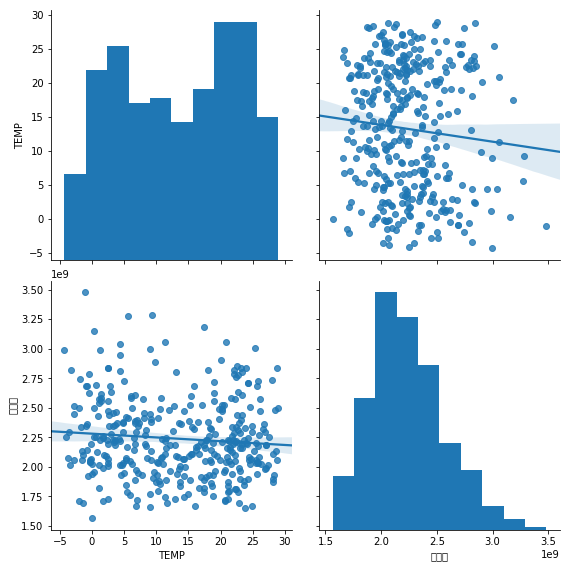

In [127]:
pair = airpw[['TEMP', '취급액']]
sns.pairplot(pair, kind='reg', height=4)  

In [128]:
# 피어슨 상관계수 검정
corr = stats.pearsonr(airpw.TEMP, airpw.취급액)
corr

(-0.08867107530744298, 0.0907258454602049)